<a href="https://colab.research.google.com/github/atalaydenknalbant/weather_data_analysis_2016corgis/blob/main/weather_data_analysis_2016corgis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Data Analysis(2016 Corgis Database) 
Source: https://corgis-edu.github.io/corgis/csv/weather/

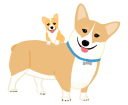

## Importing Libraries

Make sure using python version 3.10 or higher

In [ ]:
!python --version

Python 3.10.4


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import requests
import json
import plotly.express as px
from datetime import datetime

## Loading Data

In [ ]:
df = pd.read_csv("https://corgis-edu.github.io/corgis/datasets/csv/weather/weather.csv")
df.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


## Check null, duplicated and empty strings

In [ ]:
print("Total Null Values: \n\n{}".format(df.isna().sum()))
print(len(df.value_counts(dropna=False, sort=False).reset_index(name='count')))
i = 0
j = 0
for col in df.columns:
  i+= len(df[df[col] == ''])
  j+= df.duplicated(subset=col, keep='first').sum()
print("\nTotal empty strings: {}".format(i))
print("\nTotal empty strings: {}".format(j))


Total Null Values: 

Data.Precipitation           0
Date.Full                    0
Date.Month                   0
Date.Week of                 0
Date.Year                    0
Station.City                 0
Station.Code                 0
Station.Location             0
Station.State                0
Data.Temperature.Avg Temp    0
Data.Temperature.Max Temp    0
Data.Temperature.Min Temp    0
Data.Wind.Direction          0
Data.Wind.Speed              0
dtype: int64
16743

Total empty strings: 0

Total empty strings: 230887


## Solve Duplicate State problem

data shows some states represented two times with their abbrevation

In [ ]:
df['Station.State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'DE', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'VA', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

we need to change them to their full names

In [ ]:
df['Station.State'].replace('VA','Virginia',inplace=True)
df['Station.State'].replace('DE','Delaware',inplace=True)

In [ ]:
df['Station.State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Vermont', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

## Hottest City in 2016

In [ ]:
hottest_cities = df[['Data.Temperature.Max Temp','Station.City','Date.Full']].nlargest(1, "Data.Temperature.Max Temp", keep='all')
for hottest_city in hottest_cities.itertuples():
  print('{}, {}, {}'.format(hottest_city[1], hottest_city[2], datetime.strptime(hottest_city[3],'%Y-%m-%d').strftime('%B %d')))

111, China Lake, July 31
111, Las Vegas, July 31


## Highest Wind Speed for Each State

In [ ]:
highest_windspeed_states = df.groupby('Station.State')['Data.Wind.Speed'].max()
for highest_windspeed_state in highest_windspeed_states.iteritems():
  print('{}: {}'.format(highest_windspeed_state[0], highest_windspeed_state[1]))

Alabama: 12.8
Alaska: 27.58
Arizona: 12.93
Arkansas: 9.21
California: 18.8
Colorado: 13.3
Connecticut: 13.46
Delaware: 14.62
Florida: 15.58
Georgia: 13.25
Hawaii: 19.22
Idaho: 12.51
Illinois: 14.43
Indiana: 15.03
Iowa: 14.33
Kansas: 16.2
Kentucky: 11.8
Louisiana: 12.64
Maine: 10.41
Maryland: 11.01
Massachusetts: 15.84
Michigan: 13.33
Minnesota: 14.41
Mississippi: 13.17
Missouri: 13.66
Montana: 21.86
Nebraska: 15.64
Nevada: 16.47
New Hampshire: 61.1
New Jersey: 14.11
New Mexico: 25.8
New York: 15.71
North Carolina: 13.12
North Dakota: 17.5
Ohio: 15.76
Oklahoma: 16.08
Oregon: 19.93
Pennsylvania: 14.46
Puerto Rico: 11.95
Rhode Island: 13.8
South Carolina: 12.2
South Dakota: 16.87
Tennessee: 9.72
Texas: 20.3
Utah: 11.15
Vermont: 9.86
Virginia: 15.72
Washington: 11.4
West Virginia: 12.13
Wisconsin: 14.7
Wyoming: 20.75


## Top 10 Most Livable Cities

In our scoring system, we will do something different. Our approach will be:

Score cities based on different weather conditions for each season(Reduce points if it's too hot or too cold during seasons.). We will use Beaufort metrics for our wind speed scoring system(if a hurricane is possible, we will thoroughly remove the city from the livable list.) We also give high scores if precipitation is low.

In [ ]:
df_cities = pd.DataFrame(df["Station.City"].unique(),columns=['Station.City'])
df_cities['Score'] = 0

def helper(season,q):
  match season:
    case 'winter':
      match q[1]:
        case precipitation if 0 <= precipitation <= 5:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 100
        case precipitation if 6 <= precipitation <= 11:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 10
        case precipitation if precipitation >=12:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += (precipitation-11) * 50
      match q[10]:
        case temperature if 78 <= temperature <= 85:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 10000
        case temperature if temperature >= 85:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= (temperature-85) * 500        
        case _ as temperature:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += (temperature-39) * 500
      match q[14]:
        case wind_speed if 0 <= round(wind_speed) <= 7:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 100
        case wind_speed if 8 <= round(wind_speed) <= 12:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 10
        case wind_speed if 13 <= round(wind_speed) <= 18:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 10
        case wind_speed if 19 <= round(wind_speed) <= 24:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 100
        case wind_speed if 25 <= round(wind_speed) <= 31: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 200
        case wind_speed if 32 <= round(wind_speed) <= 38: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 400
        case wind_speed if 39 <= round(wind_speed) <= 46: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 1000
        case wind_speed if 47 <= round(wind_speed) <= 54: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 5000
        case wind_speed if 55 <= round(wind_speed) <= 63: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 10000
        case wind_speed if round(wind_speed) >= 64: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] = float('-inf')
    case 'summer':
      match q[1]:  
        case precipitation if 0 <= precipitation <= 5:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 100
        case precipitation if 6 <= precipitation <= 11:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 10
        case precipitation if precipitation >=12:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += (precipitation-11) * -15
      match q[10]:
        case temperature if 78 <= temperature <= 85:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 10000
        case temperature if temperature >= 85:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= (temperature-85) * 500        
        case _ as temperature:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += (temperature-60) * 500
      match q[14]:
        case wind_speed if 0 <= round(wind_speed) <= 7:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 100
        case wind_speed if 8 <= round(wind_speed) <= 12:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 1000
        case wind_speed if 13 <= round(wind_speed) <= 18:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 500
        case wind_speed if 19 <= round(wind_speed) <= 24:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 10
        case wind_speed if 25 <= round(wind_speed) <= 31: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 10
        case wind_speed if 32 <= round(wind_speed) <= 38: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 50
        case wind_speed if 39 <= round(wind_speed) <= 46: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 500
        case wind_speed if 47 <= round(wind_speed) <= 54: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 5000
        case wind_speed if 55 <= round(wind_speed) <= 63: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 10000
        case wind_speed if round(wind_speed) >= 64: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] = float('-inf')
    case 'fall':
      match q[1]:
        case precipitation if 0 <= precipitation <= 5:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 100
        case precipitation if 6 <= precipitation <= 11:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 10
        case precipitation if precipitation >=12:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += (precipitation-11) * -15
      match q[10]:
        case temperature if 78 <= temperature <= 85:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 10000
        case temperature if temperature >= 85:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= (temperature-85) * 500        
        case _ as temperature:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += (temperature-45) * 500
      match q[14]:
        case wind_speed if 0 <= round(wind_speed) <= 7:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 100
        case wind_speed if 8 <= round(wind_speed) <= 12:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 10
        case wind_speed if 13 <= round(wind_speed) <= 18:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 10
        case wind_speed if 19 <= round(wind_speed) <= 24:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 50
        case wind_speed if 25 <= round(wind_speed) <= 31: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 100
        case wind_speed if 32 <= round(wind_speed) <= 38: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 300
        case wind_speed if 39 <= round(wind_speed) <= 46: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 1000
        case wind_speed if 47 <= round(wind_speed) <= 54: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 5000
        case wind_speed if 55 <= round(wind_speed) <= 63: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 10000
        case wind_speed if round(wind_speed) >= 64: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] = float('-inf')
    case 'spring':
      match q[1]:
        case precipitation if 0 <= precipitation <= 5:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 100
        case precipitation if 6 <= precipitation <= 11:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 10
        case precipitation if precipitation >=12:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += (precipitation-11) * -15
      match q[10]:
        case temperature if 78 <= temperature <= 85:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 10000
        case temperature if temperature >= 85:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= (temperature-85) * 500        
        case _ as temperature:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += (temperature-35) * 500
      match q[14]:
        case wind_speed if 0 <= round(wind_speed) <= 7:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 100
        case wind_speed if 8 <= round(wind_speed) <= 12:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 500
        case wind_speed if 13 <= round(wind_speed) <= 18:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] += 200
        case wind_speed if 19 <= round(wind_speed) <= 24:
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 25
        case wind_speed if 25 <= round(wind_speed) <= 31: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 50
        case wind_speed if 32 <= round(wind_speed) <= 38: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 100
        case wind_speed if 39 <= round(wind_speed) <= 46: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 700
        case wind_speed if 47 <= round(wind_speed) <= 54: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 5000
        case wind_speed if 55 <= round(wind_speed) <= 63: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] -= 10000
        case wind_speed if round(wind_speed) >= 64: 
          df_cities.loc[df_cities['Station.City'] == city[1], 'Score'] = float('-inf')


for city in df_cities.itertuples():
  query = df.loc[df['Station.City'] == city[1]]
  cities_query = df_cities.loc[df_cities['Station.City'] == city[1]]
  for q in query.itertuples():
    match q[3]:
      case 1:
        helper('winter',q)
      case 2:
        helper('winter',q)
      case 3:
        helper('spring',q)
      case 4:
        helper('spring',q)
      case 5:
        helper('spring',q)
      case 6:
        helper('summer',q)
      case 7:
        helper('summer',q)      
      case 8:
        helper('summer',q)
      case 9:
        helper('fall',q)
      case 10:
        helper('fall',q)
      case 11:
        helper('fall',q)
      case 12:
        helper('winter',q)

In [ ]:
best = df_cities.nlargest(10, 'Score', keep='all')
for best in best.itertuples():
  print('{}: {}'.format(best[1], best[2]))

Jackson: 921140.0
Charleston: 873970.0
Hilo: 816674.55
Wilmington: 815770.0
Columbia: 806170.0
Kahului: 768440.0
Kaunakakai: 761750.0
Lihue: 744680.0
Honolulu: 728570.0
Fort Lauderdale: 711640.0
